In [1]:
from __future__ import print_function
import os
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pylab as plt
plt.style.use('bmh')
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor

In [3]:
pd.set_option('display.max_columns', 85)
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print('train shape:', train.shape, '\n', 'test shape:', test.shape)
train.head()

train shape: (1460, 81) 
 test shape: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
missing_numeric = pd.concat([train.isnull().sum(), test.isnull().sum()], axis=1, keys=['train', 'test'])
missing_numeric = missing_numeric[(missing_numeric['train']>0) | (missing_numeric['test']>0)]
missing_numeric.sort_values(by=['train', 'test'], ascending=False)

,train,test
PoolQC,1453,1456.0
MiscFeature,1406,1408.0
Alley,1369,1352.0
Fence,1179,1169.0
FireplaceQu,690,730.0
LotFrontage,259,227.0
GarageYrBlt,81,78.0
GarageFinish,81,78.0
GarageQual,81,78.0
GarageCond,81,78.0


In [5]:

# Drop the features which I'm not interested in 
feature_drop = ['PoolQC', 'MiscFeature', 'Fence', 'FireplaceQu', 'LotFrontage', 'GarageYrBlt', 'MoSold', 'YrSold', 
                'LowQualFinSF', 'MiscVal', 'PoolArea']
datasets = [train, test]
for df in datasets:
    df.drop(feature_drop, axis=1, inplace=True)
    df.loc[df['Alley'].isnull(), 'Alley'] = 'NoAlley'
# If a house has no garage, it will have missing value on the 'Garage related' features, so just fill NaNs with 'NoGarage'.
    df.loc[df['GarageCond'].isnull(), 'GarageCond'] = 'NoGarage'
    df.loc[df['GarageQual'].isnull(), 'GarageQual'] = 'NoGarage'
    df.loc[df['GarageType'].isnull(), 'GarageType'] = 'NoGarage'
    df.loc[df['GarageFinish'].isnull(), 'GarageFinish'] = 'NoGarage'
    
# If a house has no basement, it will have missing value on the 'basement related' features, so just fill NaNs with 'NoBsmt'.    
    df.loc[df['BsmtExposure'].isnull(), 'BsmtExposure'] = 'NoBsmt'
    df.loc[df['BsmtFinType2'].isnull(), 'BsmtFinType2'] = 'NoBsmt'
    df.loc[df['BsmtCond'].isnull(), 'BsmtCond'] = 'NoBsmt'
    df.loc[df['BsmtQual'].isnull(), 'BsmtQual'] = 'NoBsmt'
    df.loc[df['BsmtFinType1'].isnull(), 'BsmtFinType1'] = 'NoBsmt'
    
# Masonry veneer feature: just fill with 'None' if there is no Masonry veneer.    
    df.loc[df['MasVnrType'].isnull(), 'MasVnrType'] = 'None'
    df.loc[df['MasVnrArea'].isnull(), 'MasVnrArea'] = 0
       
train['Electrical'].fillna(train['Electrical'].mode()[0], inplace=True)

test_numeric_missing = ['BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'GarageArea', 'GarageCars', 'TotalBsmtSF']
test_categorical_missing = ['MSZoning', 'Functional', 'Utilities', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'SaleType']

for i in test_numeric_missing:
    test[i].fillna(0, inplace=True)
for j in test_categorical_missing:
    test[j].fillna(test[j].mode()[0], inplace=True)

# Check the missing values again for datasets
missing_numeric = pd.concat([train.isnull().sum(), test.isnull().sum()], axis=1, keys=['train', 'test'])
missing_numeric = missing_numeric[(missing_numeric['train']>0) | (missing_numeric['test']>0)]
missing_numeric.sort_values(by=['train', 'test'], ascending=False)

,train,test


In [6]:
train.select_dtypes(exclude=[object]).describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,755000.000000


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64 

Before Transformation Skew:  1.8828757597682129
Log Transformation Skew:  0.12134661989685333


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FA8DA23C48>,
      dtype=object)

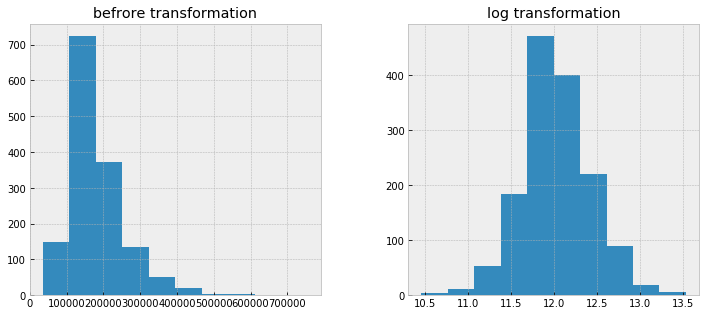

In [7]:

print(train['SalePrice'].describe(), '\n')
print('Before Transformation Skew: ', train['SalePrice'].skew())

target = np.log1p(train['SalePrice'])
print('Log Transformation Skew: ', target.skew())

plt.rcParams['figure.figsize'] = (12, 5)
target_log_tran = pd.DataFrame({'befrore transformation':train['SalePrice'], 'log transformation': target})
target_log_tran.hist()

In [8]:
skewness = pd.DataFrame({'Skewness':train.select_dtypes(exclude=[object]).skew()})

print(skewness[skewness['Skewness']>0.8].sort_values(by='Skewness'), '\n')  
print(skewness[skewness['Skewness']>0.8].sort_values(by='Skewness').index.tolist())

                Skewness
2ndFlrSF        0.813030
BsmtUnfSF       0.920268
GrLivArea       1.366560
1stFlrSF        1.376757
MSSubClass      1.407657
TotalBsmtSF     1.524255
WoodDeckSF      1.541376
BsmtFinSF1      1.685503
SalePrice       1.882876
OpenPorchSF     2.364342
MasVnrArea      2.677616
EnclosedPorch   3.089872
BsmtHalfBath    4.103403
ScreenPorch     4.122214
BsmtFinSF2      4.255261
KitchenAbvGr    4.488397
3SsnPorch      10.304342
LotArea        12.207688 

['2ndFlrSF', 'BsmtUnfSF', 'GrLivArea', '1stFlrSF', 'MSSubClass', 'TotalBsmtSF', 'WoodDeckSF', 'BsmtFinSF1', 'SalePrice', 'OpenPorchSF', 'MasVnrArea', 'EnclosedPorch', 'BsmtHalfBath', 'ScreenPorch', 'BsmtFinSF2', 'KitchenAbvGr', '3SsnPorch', 'LotArea']


In [9]:
skews = ['2ndFlrSF', 'BsmtUnfSF', 'GrLivArea', '1stFlrSF', 'MSSubClass', 'TotalBsmtSF', 'WoodDeckSF', 'BsmtFinSF1', 'OpenPorchSF', 
         'MasVnrArea', 'EnclosedPorch', 'BsmtHalfBath', 'ScreenPorch', 'BsmtFinSF2', 'KitchenAbvGr', '3SsnPorch', 'LotArea']
for df in datasets:
    for s in skews:
        df[s] = np.log1p(df[s])

In [10]:
corr = train.select_dtypes(exclude=[object]).corr()
print(corr['SalePrice'].sort_values(ascending=False)[:22], '\n')
print(corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.695147
GarageCars      0.640409
GarageArea      0.623431
1stFlrSF        0.591299
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Fireplaces      0.466929
OpenPorchSF     0.429970
MasVnrArea      0.405162
LotArea         0.388528
TotalBsmtSF     0.325883
WoodDeckSF      0.321450
HalfBath        0.284108
BsmtFullBath    0.227122
BsmtUnfSF       0.186572
BsmtFinSF1      0.185472
BedroomAbvGr    0.168213
2ndFlrSF        0.167849
Name: SalePrice, dtype: float64 

MSSubClass      -0.034217
BsmtFinSF2      -0.048267
OverallCond     -0.077856
KitchenAbvGr    -0.132905
EnclosedPorch   -0.176065
Name: SalePrice, dtype: float64


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5]),
 <a list of 21 Text xticklabel objects>)

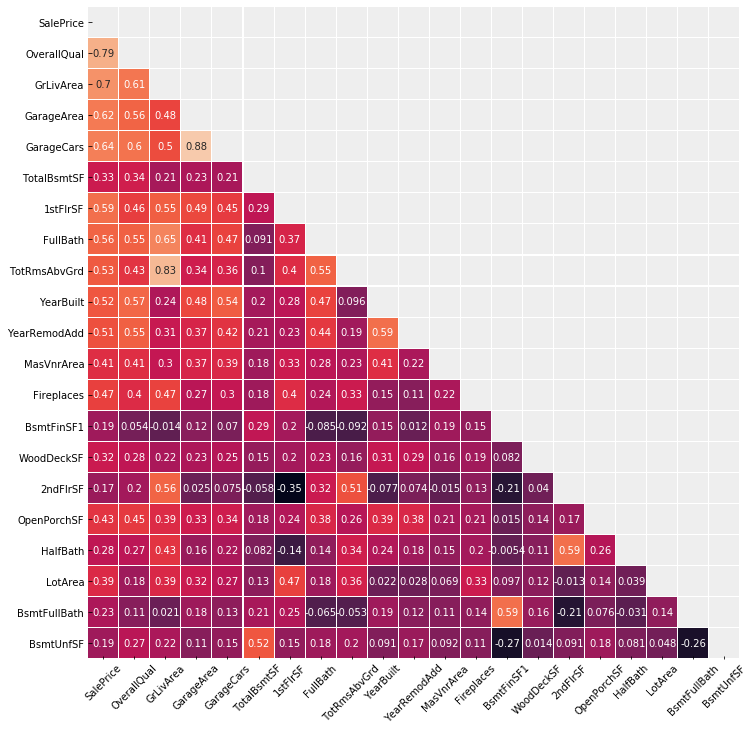

In [11]:
numeric_data = train[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 
                             'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1',
                            'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'LotArea', 'BsmtFullBath', 'BsmtUnfSF']]

corr = numeric_data.corr()
plt.figure(figsize=(12, 12))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, vmax=1, square=True, annot=True, mask=mask, cbar=False, linewidths=0.1)
plt.xticks(rotation=45)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 <a list of 14 Text xticklabel objects>)

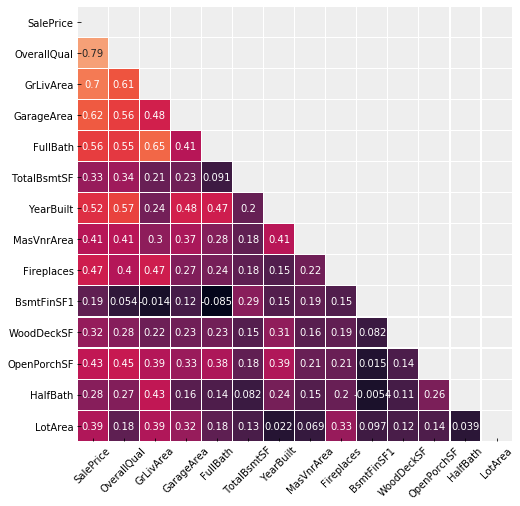

In [12]:
numeric_data_select = train[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'FullBath', 'TotalBsmtSF', 
                                    'YearBuilt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'WoodDeckSF', 'OpenPorchSF',
                                    'HalfBath', 'LotArea']]
corr_select = numeric_data_select.corr()
plt.figure(figsize=(8, 8))
mask = np.zeros_like(corr_select)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_select, vmax=1, square=True, annot=True, mask=mask, cbar=False, linewidths=0.1)
plt.xticks(rotation=45)

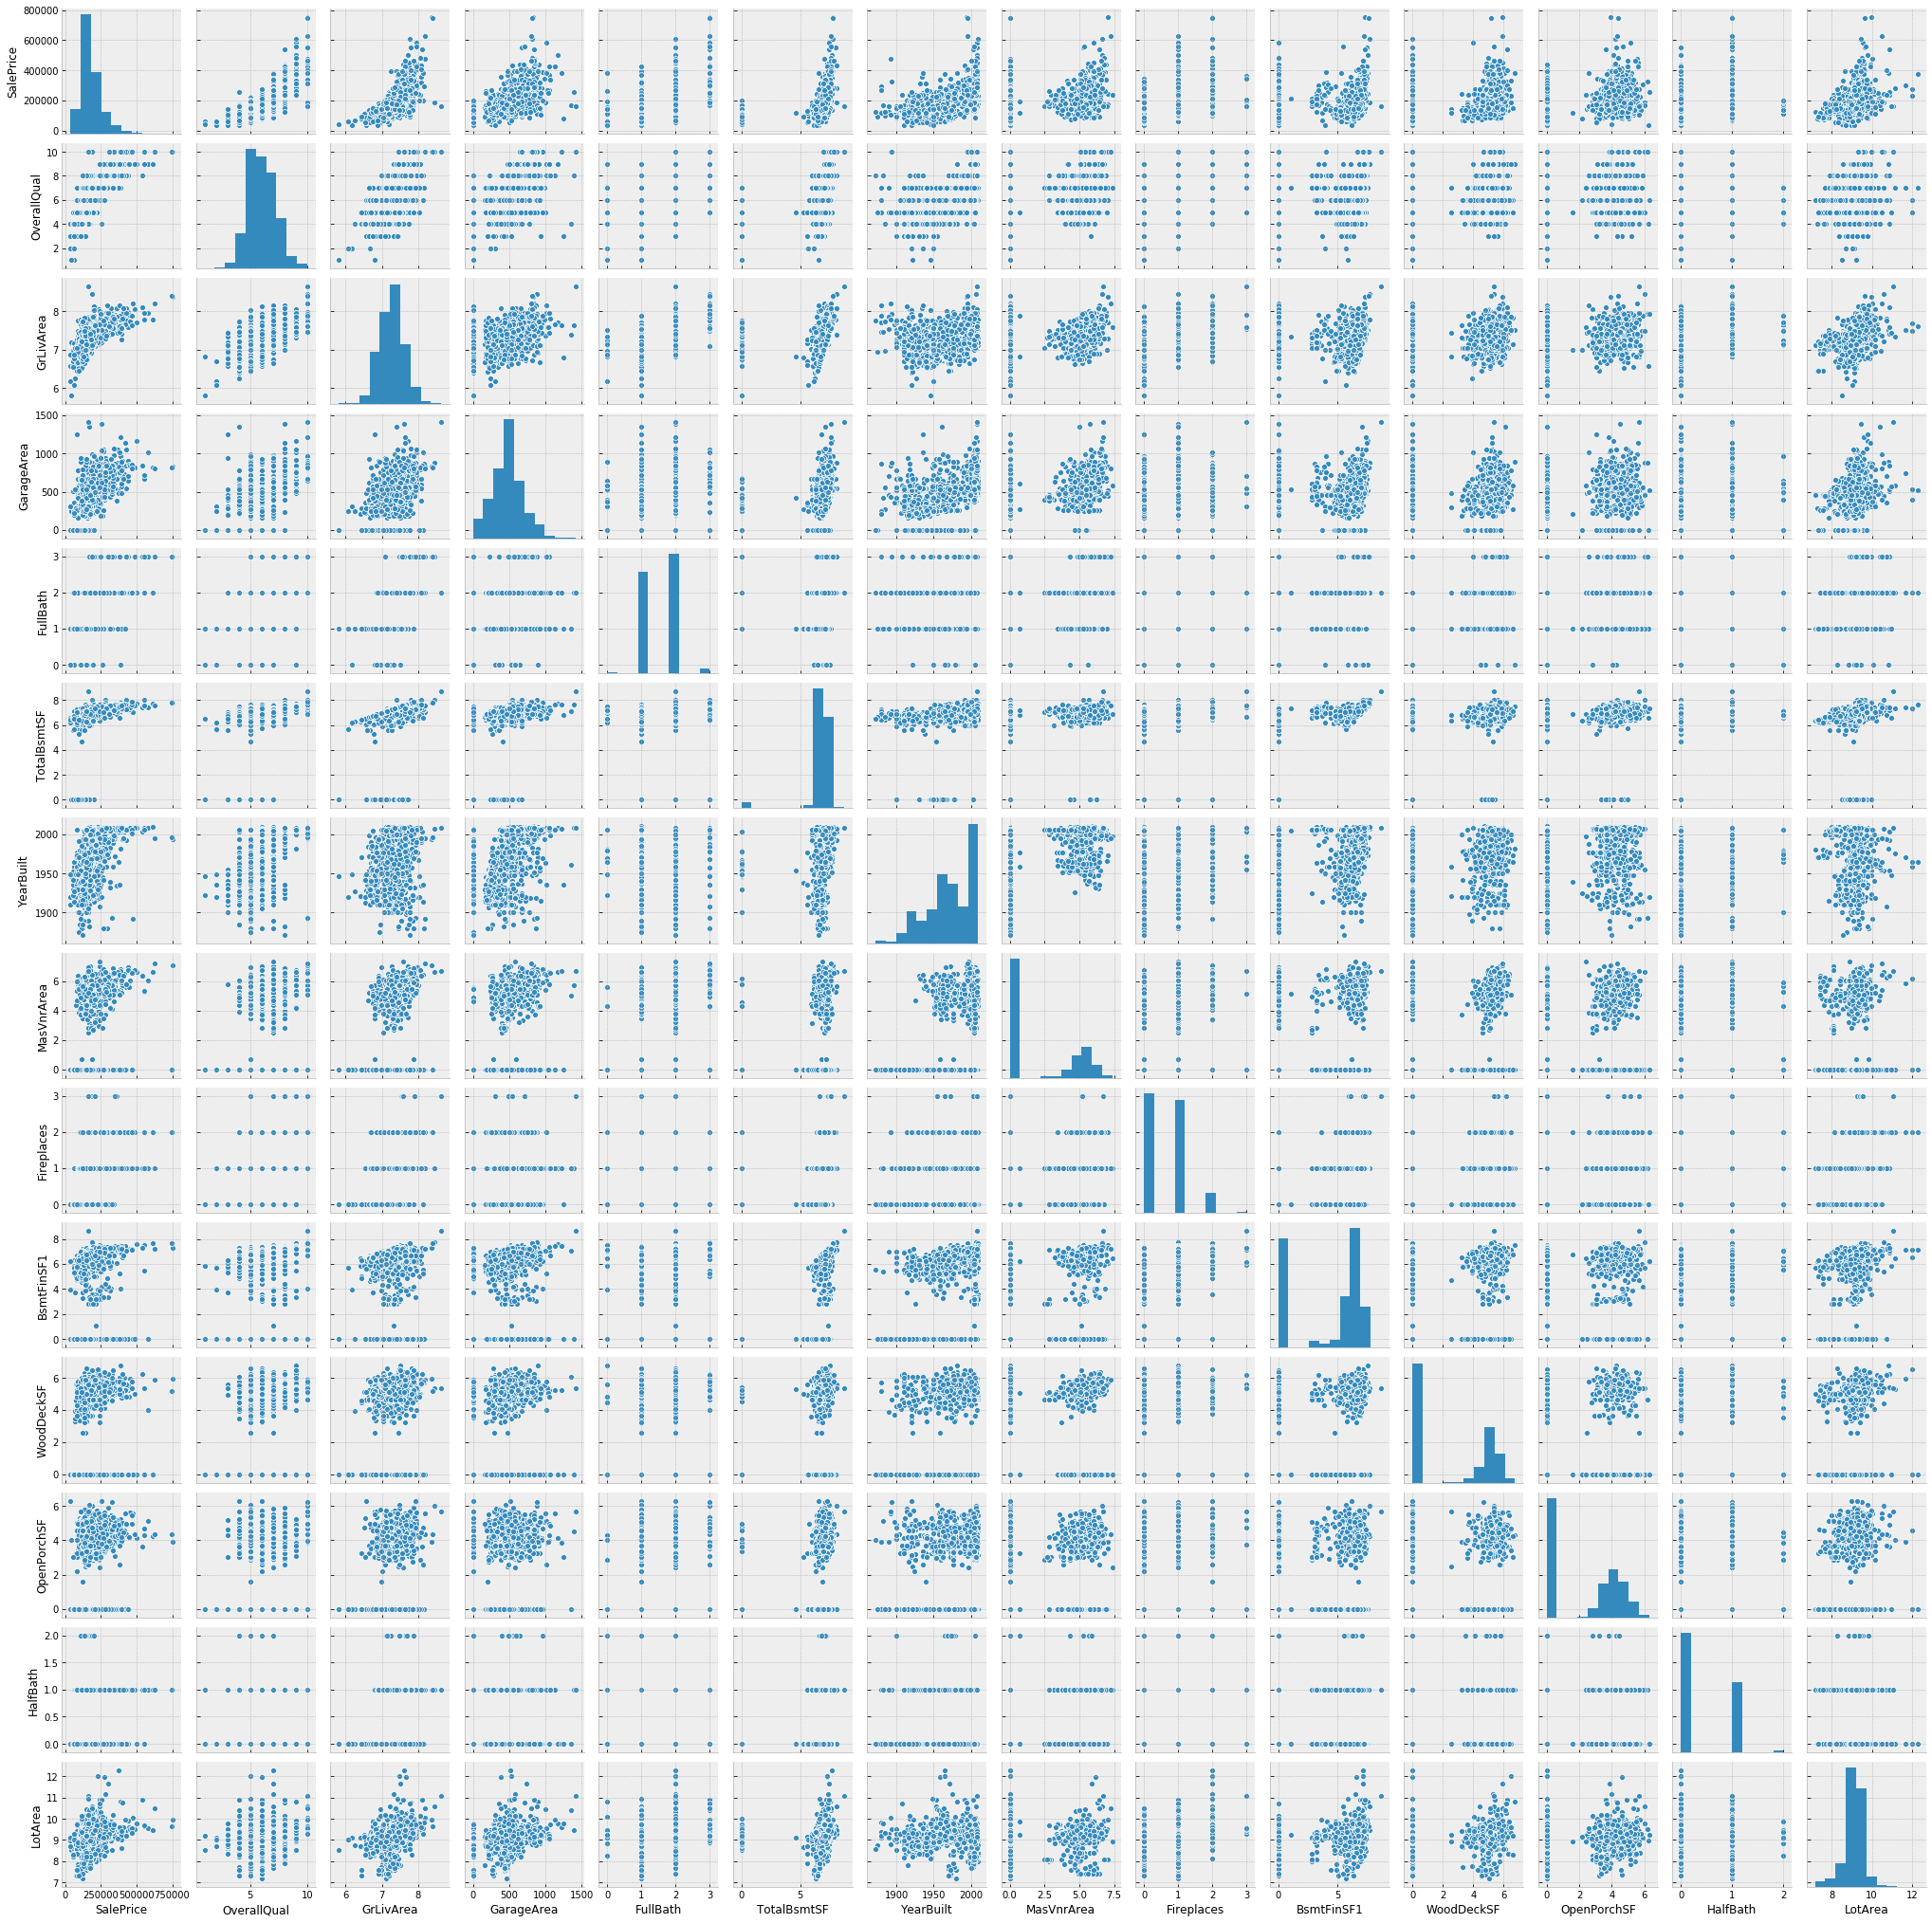

In [13]:
sns.pairplot(numeric_data_select, height=2)

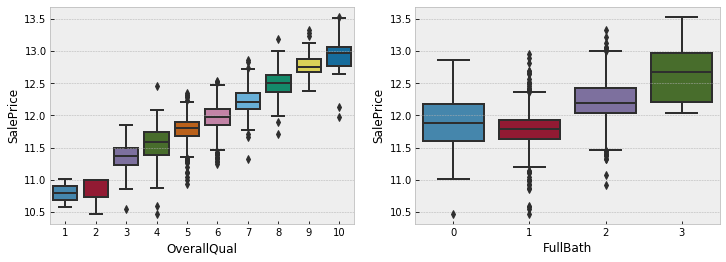

In [14]:
plt.rcParams['figure.figsize'] = (12, 4)
plt.subplot(121)
sns.boxplot(train['OverallQual'], target)
plt.subplot(122)
sns.boxplot(train['FullBath'], target)

Text(0, 0.5, 'SalePrice')

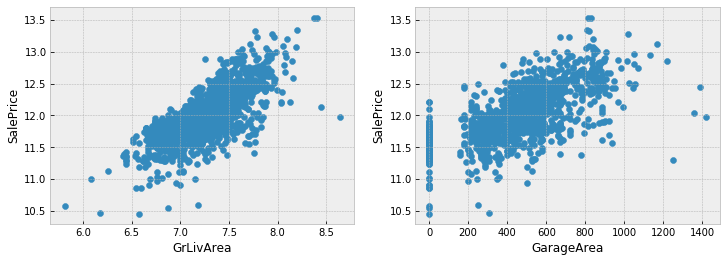

In [15]:
plt.subplot(121)
plt.scatter(train['GrLivArea'], target)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.subplot(122)
plt.scatter(train['GarageArea'], target)
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')

Text(0, 0.5, 'SalePrice')

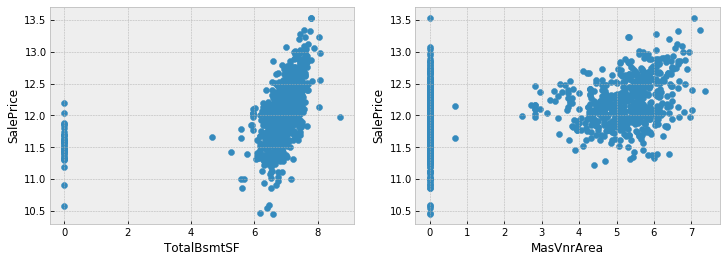

In [16]:
plt.subplot(121)
plt.scatter(train['TotalBsmtSF'], target)
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')

plt.subplot(122)
plt.scatter(train['MasVnrArea'], target)
plt.xlabel('MasVnrArea')
plt.ylabel('SalePrice')

Text(0.5, 0, 'YearBuilt')

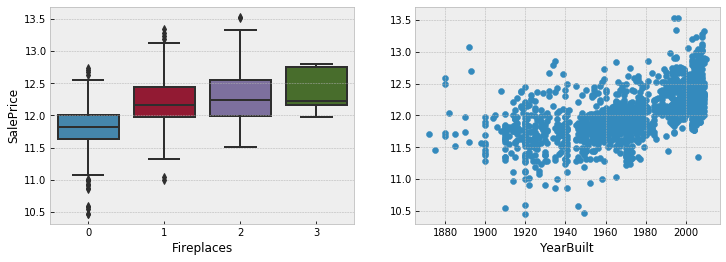

In [17]:
plt.subplot(121)
sns.boxplot(train['Fireplaces'], target)

plt.subplot(122)
plt.scatter(train['YearBuilt'], target)
plt.xlabel('YearBuilt')

Text(0, 0.5, 'SalePrice')

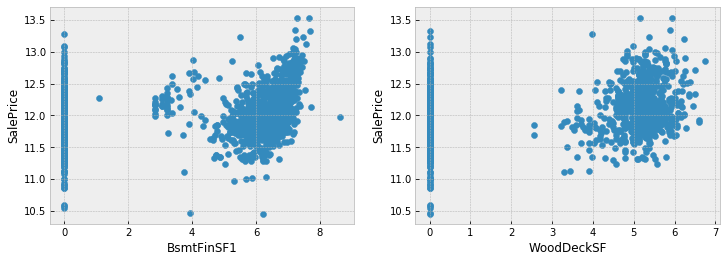

In [18]:
plt.subplot(121)
plt.scatter(train['BsmtFinSF1'], target)
plt.xlabel('BsmtFinSF1')
plt.ylabel('SalePrice')

plt.subplot(122)
plt.scatter(train['WoodDeckSF'], target)
plt.xlabel('WoodDeckSF')
plt.ylabel('SalePrice')

In [19]:
#Removing outliners
index_remove = train[train['GrLivArea'] > 8.5].index.tolist()+train[train['GarageArea'] > 1200].index.tolist()+train[train['TotalBsmtSF'] > 8.2].index.tolist()+train[train['BsmtFinSF1'] > 8].index.tolist()
index_remove = list(set(index_remove))  # remove duplicate values
index_remove.append(523)
print(index_remove)          

train = train.drop(train.index[index_remove], axis=0)
train = train[train['SalePrice'] <=550000]

[1061, 581, 1190, 1298, 825, 523]


In [20]:
#categorial data manupulation
categorical_data = train.select_dtypes(include=[object])
categorical_data.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1447,1447,1447,1447,1447,1447,1447,1447,1447,1447,1447,1447,1447,1447,1447,1447,1447,1447,1447,1447,1447,1447,1447,1447,1447,1447,1447,1447,1447,1447,1447,1447,1447,1447,1447,1447,1447,1447,1447
unique,5,2,3,4,4,2,5,3,25,9,7,5,8,6,7,15,16,4,4,5,6,5,5,5,7,7,6,5,2,5,4,7,7,4,6,6,3,9,6
top,RL,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1139,1442,1356,919,1302,1446,1043,1370,225,1250,1434,1208,720,1138,1423,511,500,870,905,1271,636,647,1298,951,427,1244,1415,729,1352,1322,733,1347,862,605,1298,1313,1327,1262,1193


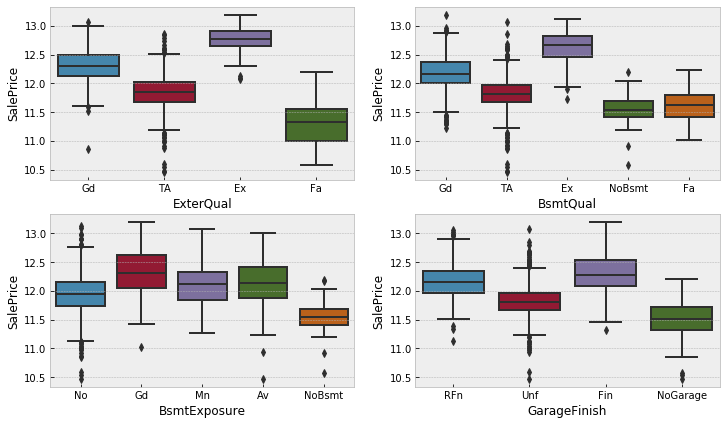

In [21]:
plt.rcParams['figure.figsize'] = (12, 7)
plt.subplot(221)
sns.boxplot(train['ExterQual'], target)
plt.subplot(222)
sns.boxplot(train['BsmtQual'], target)
plt.subplot(223)
sns.boxplot(train['BsmtExposure'], target)
plt.subplot(224)
sns.boxplot(train['GarageFinish'], target)

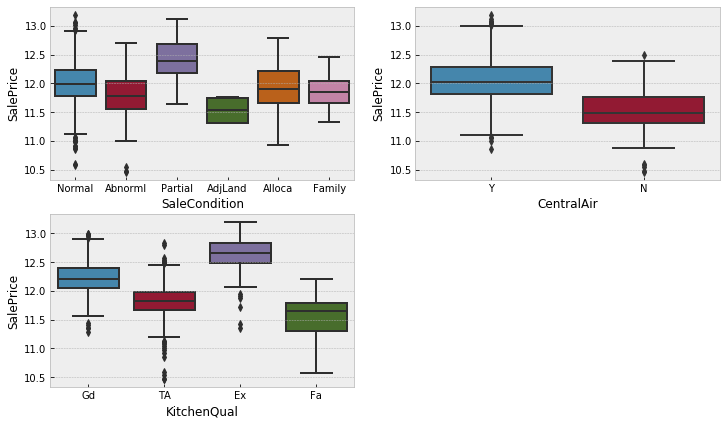

In [22]:
plt.subplot(221)
sns.boxplot(train['SaleCondition'], target)
plt.subplot(222)
sns.boxplot(train['CentralAir'], target)
plt.subplot(223)
sns.boxplot(train['KitchenQual'], target)

In [23]:

train_ExterQual_dummy = pd.get_dummies(train['ExterQual'], prefix='ExterQual')
test_ExterQual_dummy = pd.get_dummies(test['ExterQual'], prefix='ExterQual')

train_BsmtQual_dummy = pd.get_dummies(train['BsmtQual'], prefix='BsmtQual')
test_BsmtQual_dummy = pd.get_dummies(test['BsmtQual'], prefix='BsmtQual')

train_BsmtExposure_dummy = pd.get_dummies(train['BsmtExposure'], prefix='BsmtExposure')
test_BsmtExposure_dummy = pd.get_dummies(test['BsmtExposure'], prefix='BsmtExposure')

train_GarageFinish_dummy = pd.get_dummies(train['GarageFinish'], prefix='GarageFinish')
test_GarageFinish_dummy = pd.get_dummies(test['GarageFinish'], prefix='GarageFinish')

train_SaleCondition_dummy = pd.get_dummies(train['SaleCondition'], prefix='SaleCondition')
test_SaleCondition_dummy = pd.get_dummies(test['SaleCondition'], prefix='SaleCondition')

train_CentralAir_dummy = pd.get_dummies(train['CentralAir'], prefix='CentralAir')
test_CentralAir_dummy = pd.get_dummies(test['CentralAir'], prefix='CentralAir')

train_KitchenQual_dummy = pd.get_dummies(train['KitchenQual'], prefix='KitchenQual')
test_KitchenQual_dummy = pd.get_dummies(test['KitchenQual'], prefix='KitchenQual')

In [24]:
# Define a model evaluation function by outputing R2 score and mean squared error. (using 10-fold cross validation)
def model_eval(model):
    model_fit = model.fit(X, y)
    R2 = cross_val_score(model_fit, X, y, cv=10 , scoring='r2').mean()
    MSE = -cross_val_score(lr, X, y, cv=10 , scoring='neg_mean_squared_error').mean()
    print('R2 Score:', R2, '|', 'MSE:', MSE)

In [25]:
data = train.select_dtypes(exclude=[object])
y = np.log1p(data['SalePrice'])
X = data.drop(['Id', 'SalePrice'], axis=1)
X = pd.concat([X, train_ExterQual_dummy, train_BsmtQual_dummy, train_GarageFinish_dummy, train_BsmtExposure_dummy,
              train_SaleCondition_dummy, train_CentralAir_dummy, train_KitchenQual_dummy], axis=1)

In [26]:
lr = LinearRegression()
ri = Ridge(alpha=0.1, normalize=False)
ricv = RidgeCV(cv=5)
gdb = GradientBoostingRegressor(n_estimators=200)

In [27]:
for model in [lr, ri, ricv, gdb]:
    model_eval(model)

R2 Score: 0.9043064518703462 | MSE: 0.014341588209029185
R2 Score: 0.9043898051510493 | MSE: 0.014341588209029185
R2 Score: 0.9043338206380444 | MSE: 0.014341588209029185
R2 Score: 0.9003478638289358 | MSE: 0.014341588209029185


In [28]:
test_id = test['Id']
test = test.select_dtypes(exclude=[object]).drop('Id', axis=1)
test = pd.concat([test, test_ExterQual_dummy, test_BsmtQual_dummy, test_GarageFinish_dummy, test_BsmtExposure_dummy,
              test_SaleCondition_dummy, test_CentralAir_dummy, test_KitchenQual_dummy], axis=1)

In [29]:
pred = ri.predict(test)

In [30]:
pred = np.expm1(pred)
prediction = pd.DataFrame({'Id':test_id, 'SalePrice':pred})
prediction.to_csv('Prediction1.csv', index=False)
prediction.head()

,Id,SalePrice
0,1461,124447.624150
1,1462,162526.900451
2,1463,182005.785228
3,1464,197244.351862
4,1465,190208.821526


Text(0, 0.5, 'True Values')

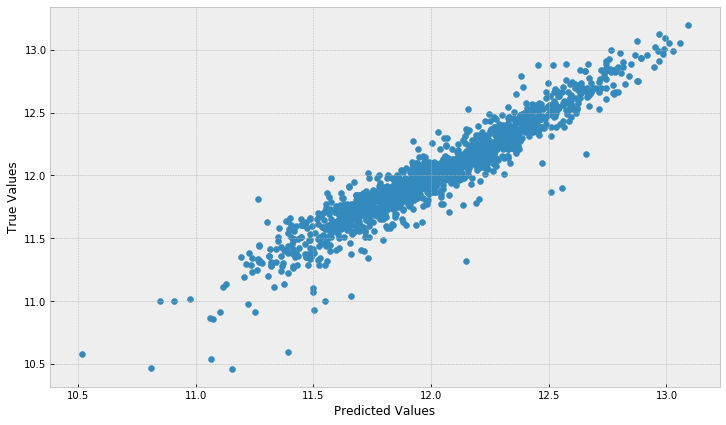

In [31]:
plt.scatter(cross_val_predict(lr, X, y), y)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')